In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import torch
from source.network import NNClassifier
from source.helpme import show_history, show_image, load_fmnist, load_mnist, calculate_pad
from sklearn.datasets import load_digits
import numpy as np
import torchvision
import os
from torchvision import transforms
#import torchsummary

In [4]:
X, y = load_mnist()

 99%|██████████████████████████████████████████████████████████████████▌| 9846784/9912422 [00:16<00:00, 1170164.65it/s]

Extracting C:\Users\FrostDad\Desktop\ml-campus-master\data\mnist\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\FrostDad\Desktop\ml-campus-master\data\mnist\MNIST\raw



0it [00:00, ?it/s]
 57%|█████████████████████████████████████████▍                               | 16384/28881 [00:00<00:00, 90520.06it/s]
32768it [00:00, 49384.29it/s]                                                                                          

Extracting C:\Users\FrostDad\Desktop\ml-campus-master\data\mnist\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\FrostDad\Desktop\ml-campus-master\data\mnist\MNIST\raw



0it [00:00, ?it/s]
 97%|██████████████████████████████████████████████████████████████████▏ | 1605632/1648877 [00:04<00:00, 595939.93it/s]

Extracting C:\Users\FrostDad\Desktop\ml-campus-master\data\mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\FrostDad\Desktop\ml-campus-master\data\mnist\MNIST\raw




0it [00:00, ?it/s]

  0%|                                                                                         | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 17259.62it/s]                                                                                           

Extracting C:\Users\FrostDad\Desktop\ml-campus-master\data\mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\FrostDad\Desktop\ml-campus-master\data\mnist\MNIST\raw
Processing...
Done!


C:\Users\FrostDad\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\FrostDad\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\FrostDad\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\FrostDad\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [6]:
X.shape

(70000, 1, 28, 28)

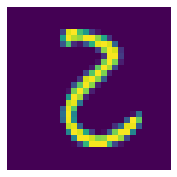

In [7]:
show_image(X[1058][0], figsize=(3,3))

# Convolutional neural network

In [8]:
class Softmax_layer(torch.nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        e = torch.exp(x - x.max(1, True)[0] )
        summ = e.sum(1, True)[0]
        return e / summ

In [9]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        N = x.shape[0]
        return x.view(N, -1)

In [10]:
conv_net = torch.nn.Sequential(torch.nn.Conv2d(1, 16, 3, stride=2, padding=3),
                                    torch.nn.ReLU(),
                                    # 16x16x16
                               
                                    torch.nn.Conv2d(16, 32, 3, stride=2, padding=1),
                                    torch.nn.ReLU(),
                                    # 8x8x32
                               
                                    torch.nn.Conv2d(32, 64, 3, stride=2, padding=1),
                                    torch.nn.ReLU(),
                                    # 4x4x64
                               
                                    Flatten(),
                                    torch.nn.Linear(1024, 10),
                                    Softmax_layer())

In [11]:
model = NNClassifier(conv_net, lr=1e-3)

In [15]:
X_train = X[:5000]
y_train = y[:5000]

X_valid = X[5000:6000]
y_valid = y[5000:6000]

X_test = X[6000:7000]
y_test = y[6000:7000]

In [18]:
model.fit(X_train, y_train, epochs=2, batch_size=256, 
          valid_data=(X_valid, y_valid))

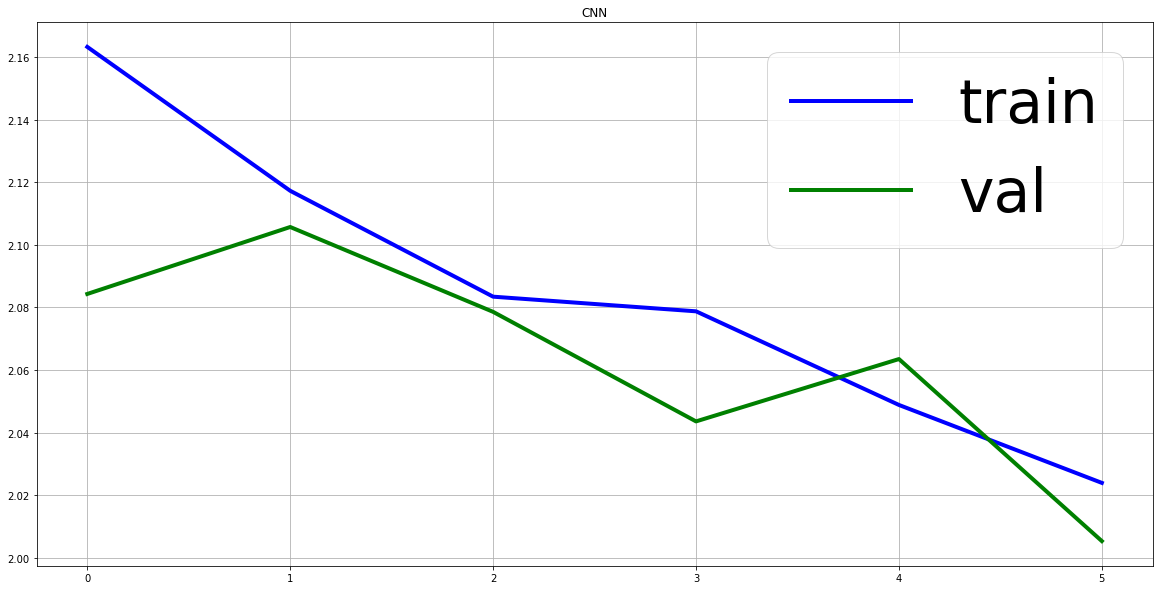

In [19]:
show_history(model.train_history, model.valid_history, title='CNN', fontsize=60, figsize=(20, 10))

In [20]:
model.evaluate_score(X_test, y_test) 

0.459